# AlphaNet v2复现

### Import Packages

In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random

### 获取数据: 中证500股票量价数据

In [2]:
ts.set_token('5e2fc486832f079bccf0bbc63e1141e6f7ec6d9b4fd1ca45fb435b06')
pro = ts.pro_api()
zz500_code = pro.index_weight(index_code='000905.SH', trade_date = '20220531')

In [3]:
zz500_code

,index_code,con_code,trade_date,weight
0,000905.SH,600497.SH,20220531,0.306
1,000905.SH,000031.SZ,20220531,0.086
2,000905.SH,600126.SH,20220531,0.122
3,000905.SH,300058.SZ,20220531,0.271
4,000905.SH,002690.SZ,20220531,0.114
...,...,...,...,...
495,000905.SH,002673.SZ,20220531,0.288
496,000905.SH,000012.SZ,20220531,0.148
497,000905.SH,600339.SH,20220531,0.089
498,000905.SH,000898.SZ,20220531,0.145


In [4]:
'''
zz500 = pro.daily(ts_code=zz500_code['con_code'][0], start_date='20160131', end_date='20220531')
for i in range(1,500):
    temp = pro.daily(ts_code=zz500_code['con_code'][i], start_date='20160131', end_date='20220531')
    zz500 = pd.concat([zz500, temp])
'''

"\nzz500 = pro.daily(ts_code=zz500_code['con_code'][0], start_date='20160131', end_date='20220531')\nfor i in range(1,500):\n    temp = pro.daily(ts_code=zz500_code['con_code'][i], start_date='20160131', end_date='20220531')\n    zz500 = pd.concat([zz500, temp])\n"

In [5]:
'''
#计算交易量加权均价
zz500['vwap'] = (zz500['amount']/zz500['vol'])*10

#获取换手率，换手率（自由流通股）
turnover = pro.daily_basic(ts_code=zz500_code['con_code'][0], start_date='20160131', end_date='20220531', fields='ts_code,trade_date,turnover_rate,turnover_rate_f')
for i in range(1, 500):
    temp = pro.daily_basic(ts_code=zz500_code['con_code'][i], start_date='20160131', end_date='20220531', fields='ts_code,trade_date,turnover_rate,turnover_rate_f')
    turnover = pd.concat([turnover, temp])
'''    

"\n#计算交易量加权均价\nzz500['vwap'] = (zz500['amount']/zz500['vol'])*10\n\n#获取换手率，换手率（自由流通股）\nturnover = pro.daily_basic(ts_code=zz500_code['con_code'][0], start_date='20160131', end_date='20220531', fields='ts_code,trade_date,turnover_rate,turnover_rate_f')\nfor i in range(1, 500):\n    temp = pro.daily_basic(ts_code=zz500_code['con_code'][i], start_date='20160131', end_date='20220531', fields='ts_code,trade_date,turnover_rate,turnover_rate_f')\n    turnover = pd.concat([turnover, temp])\n"

In [6]:
'''
#加入换手率
zz500['turnover_rate'], zz500['turnover_rate_f'] = turnover['turnover_rate'], turnover['turnover_rate_f']
#删除个股上市首日的行
zz500 = zz500.drop(zz500[abs(zz500['pct_chg']) > 20].index)
'''

"\n#加入换手率\nzz500['turnover_rate'], zz500['turnover_rate_f'] = turnover['turnover_rate'], turnover['turnover_rate_f']\n#删除个股上市首日的行\nzz500 = zz500.drop(zz500[abs(zz500['pct_chg']) > 20].index)\n"

In [7]:
#极值处理与标准化
def three_sigma(series, n):
    mean = series.mean()
    std = series.std()
    max_range = mean + n*std
    min_range = mean - n*std
    return np.clip(series, min_range, max_range)

def standard_z_score(series):
    std = series.std()
    mean = series.mean()
    return (series-mean)/std
    
'''    
for (columnName, columnData) in zz500.iteritems():
    if columnName != 'ts_code' and columnName != 'trade_date':
        zz500[columnName] = standard_z_score(three_sigma(columnData, 3))
'''

"    \nfor (columnName, columnData) in zz500.iteritems():\n    if columnName != 'ts_code' and columnName != 'trade_date':\n        zz500[columnName] = standard_z_score(three_sigma(columnData, 3))\n"

In [8]:
'''
zz500.dropna(inplace=True)
zz500
'''

'\nzz500.dropna(inplace=True)\nzz500\n'

In [9]:
zz500 = pd.read_csv('zz500_2.csv')

In [10]:
#batch size = 500
D_X = []
D_Y = []
n = 0
for code in zz500_code['con_code']:
    temp = zz500[zz500['ts_code'] == code].sort_values(by = 'trade_date')
    temp = temp.reset_index(drop=True)
    temp_X, temp_Y = data_image(temp)
    D_X.append(temp_X)
    D_Y.append(temp_Y)
    n += 1
    print(str(n) + '//' + str(500) + ' done')

1//500 done
2//500 done
3//500 done
4//500 done
5//500 done
6//500 done
7//500 done
8//500 done
9//500 done
10//500 done
11//500 done
12//500 done
13//500 done
14//500 done
15//500 done
16//500 done
17//500 done
18//500 done
19//500 done
20//500 done
21//500 done
22//500 done
23//500 done
24//500 done
25//500 done
26//500 done
27//500 done
28//500 done
29//500 done
30//500 done
31//500 done
32//500 done
33//500 done
34//500 done
35//500 done
36//500 done
37//500 done
38//500 done
39//500 done
40//500 done
41//500 done
42//500 done
43//500 done
44//500 done
45//500 done
46//500 done
47//500 done
48//500 done
49//500 done
50//500 done
51//500 done
52//500 done
53//500 done
54//500 done
55//500 done
56//500 done
57//500 done
58//500 done
59//500 done
60//500 done
61//500 done
62//500 done
63//500 done
64//500 done
65//500 done
66//500 done
67//500 done
68//500 done
69//500 done
70//500 done
71//500 done
72//500 done
73//500 done
74//500 done
75//500 done
76//500 done
77//500 done
78//500 

In [11]:
#保存数据图片到本地（npy文件）
with open('X-1-500-v2_new.npy', 'wb') as f:
    np.save(f, np.array(D_X))

with open('Y-1-500-v2_new.npy', 'wb') as f:
    np.save(f, np.array(D_Y))

<ipython-input-11-e5a07fa57701>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.save(f, np.array(D_X))
<ipython-input-11-e5a07fa57701>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.save(f, np.array(D_Y))


In [12]:
with open('X-1-500-v2_new.npy', 'rb') as f:
    a = np.load(f, allow_pickle=True)

In [13]:
with open('Y-1-500-v2_new.npy', 'rb') as f:
    b = np.load(f, allow_pickle=True)

### 获取数据: 全A股量价数据

In [10]:
ts.set_token('5e2fc486832f079bccf0bbc63e1141e6f7ec6d9b4fd1ca45fb435b06')
pro = ts.pro_api()

#查询当前所有正常上市交易的股票列表
all_stocks = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

In [11]:
all_stocks

,ts_code,symbol,name,area,industry,list_date
0,000996.SZ,000996,中国中期,北京,汽车服务,20000718
1,002008.SZ,002008,大族激光,深圳,电器仪表,20040625
2,002014.SZ,002014,永新股份,安徽,塑料,20040708
3,002026.SZ,002026,山东威达,山东,机械基件,20040727
4,002033.SZ,002033,丽江股份,云南,旅游景点,20040825
...,...,...,...,...,...,...
4838,837092.BJ,837092,汉鑫科技,None,None,20211115
4839,839680.BJ,839680,广道高新,None,None,20211115
4840,870436.BJ,870436,大地电气,None,None,20211115
4841,871981.BJ,871981,晶赛科技,None,None,20211115


In [12]:
#剔除ST,PT股
list_of_codes = []
for i,row in all_stocks.iterrows():
    if row['name'][0] == 'S' or row['name'][0] == 'P' or row['name'][1] == 'S' or row['name'][1] == 'P':
        continue
    list_of_codes.append(row['ts_code'])

In [13]:
#筛选后股票数量
len(list_of_codes)

4698

In [14]:
#读取数据
df = pd.read_csv('Daily.csv')
#删除个股上市首日的行
df = df.drop(df[abs(df['pct_chg']) > 20].index)
df.dropna(inplace=True) 

In [15]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,vwap,turnover_rate,turnover_rate_f
0,000001.SZ,20200529,13.01,13.04,12.92,13.00,13.07,-0.07,-0.5356,457808.22,594502.123,12.985833,0.2359,0.5323
1,000001.SZ,20200528,12.87,13.18,12.81,13.07,12.78,0.29,2.2692,960760.31,1255226.999,13.064934,0.4951,1.1170
2,000001.SZ,20200527,13.05,13.19,12.96,13.00,13.04,-0.04,-0.3067,482962.94,630305.864,13.050812,0.2489,0.5615
3,000001.SZ,20200526,13.02,13.07,12.94,13.04,12.96,0.08,0.6173,396212.40,515451.849,13.009483,0.2042,0.4607
4,000001.SZ,20200525,12.97,12.98,12.76,12.96,12.92,0.04,0.3096,410170.78,528769.352,12.891444,0.2114,0.4769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5752592,688598.SH,20200525,88.67,88.67,76.72,78.30,88.00,-9.70,-11.0227,53744.10,432318.716,80.440219,29.3938,29.3938
5752593,688598.SH,20200522,87.88,92.38,86.52,88.00,87.00,1.00,1.1494,43152.61,385361.645,89.302048,23.6011,23.6011
5752594,688598.SH,20200521,90.30,91.98,86.50,87.00,92.15,-5.15,-5.5887,50748.52,451369.785,88.942453,27.7555,27.7555
5752595,688598.SH,20200520,95.70,104.00,89.90,92.15,96.15,-4.00,-4.1602,79996.61,773436.634,96.683676,43.7519,43.7519


### 极值处理

In [16]:
def three_sigma(series, n):
    mean = series.mean()
    std = series.std()
    max_range = mean + n*std
    min_range = mean - n*std
    return np.clip(series, min_range, max_range)

def standard_z_score(series):
    std = series.std()
    mean = series.mean()
    return (series-mean)/std
    
    
for (columnName, columnData) in df.iteritems():
    if columnName != 'ts_code' and columnName != 'trade_date':
        df[columnName] = standard_z_score(three_sigma(columnData, 3))

### 数据处理: 个股量价数据图片（9 * 30）

In [17]:
#数据图片区间：20160131-20220531
#temp: 个股全部量价数据
def data_image(temp):   
    d_X = [] #数据图片
    d_Y = [] #标签:5日收益率
    for i,row in temp.iterrows():
        if i<29:
            continue
    
        if len(temp['open']) - i < 6:
            break
        
        matrix = np.zeros(shape=(15,30))
        matrix[0] = np.array(temp['open'][i-29:i+1])
        matrix[1] = np.array(temp['high'][i-29:i+1])
        matrix[2] = np.array(temp['low'][i-29:i+1])
        matrix[3] = np.array(temp['close'][i-29:i+1])
        matrix[4] = np.array(temp['vwap'][i-29:i+1])
        matrix[5] = np.array(temp['vol'][i-29:i+1])
        matrix[6] = np.array(temp['pct_chg'][i-29:i+1]/100)
        matrix[7] = np.array(temp['turnover_rate'][i-29:i+1])
        matrix[8] = np.array(temp['turnover_rate_f'][i-29:i+1])
        matrix[9] = matrix[3]/matrix[8]
        matrix[10] = matrix[0]/matrix[7]
        matrix[11] = matrix[5]/matrix[2]
        matrix[12] = matrix[4]/matrix[1]
        matrix[13] = matrix[2]/matrix[1]
        matrix[14] = matrix[4]/matrix[3]
        d_X.append(matrix)
    
        r_t_5 = 1
        for j in range(1,6):
            r_t_5 *= (1+temp['pct_chg'][i+j]/100)
        
        d_Y.append(r_t_5-1)
        
    return np.array(d_X), np.array(d_Y)

In [ ]:
#batch size = 200
D_X = []
D_Y = []
n = 0
for code in list_of_codes[800:1000]:
    temp = df[df['ts_code'] == code].sort_values(by = 'trade_date')
    temp = temp.reset_index(drop=True)
    temp_X, temp_Y = data_image(temp)
    D_X.append(temp_X)
    D_Y.append(temp_Y)
    n += 1
    print(str(n) + '//' + str(200) + ' done')

In [ ]:
#保存数据图片到本地（npy文件）
with open('X-800-1000-v2.npy', 'wb') as f:
    np.save(f, np.array(D_X))

with open('Y-800-1000-v2.npy', 'wb') as f:
    np.save(f, np.array(D_Y))

In [19]:
with open('X-1-200-v2.npy', 'rb') as f:
    a1 = np.load(f, allow_pickle=True)
    
with open('X-200-400-v2.npy', 'rb') as f:
    a2 = np.load(f, allow_pickle=True)

with open('X-400-600-v2.npy', 'rb') as f:
    a3 = np.load(f, allow_pickle=True)

with open('X-600-800-v2.npy', 'rb') as f:
    a4 = np.load(f, allow_pickle=True)
    
with open('X-800-1000-v2.npy', 'rb') as f:
    a5 = np.load(f, allow_pickle=True)
    
a = np.concatenate((a1,a2,a3,a4,a5))

In [21]:
with open('Y-1-200-v2.npy', 'rb') as f:
    b1 = np.load(f, allow_pickle=True)

with open('Y-200-400-v2.npy', 'rb') as f:
    b2 = np.load(f, allow_pickle=True)
    
with open('Y-400-600-v2.npy', 'rb') as f:
    b3 = np.load(f, allow_pickle=True)

with open('Y-600-800-v2.npy', 'rb') as f:
    b4 = np.load(f, allow_pickle=True)

with open('Y-800-1000-v2.npy', 'rb') as f:
    b5 = np.load(f, allow_pickle=True)
    
b = np.concatenate((b1,b2,b3,b4,b5))

### 特征提取层

In [22]:
#ts_corr(X,Y,d), d = 10, stride = 10
def ts_corr_10(X:15*30):
    results = []
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            for j in range(i+1, len(x)):
                result1.append(np.cov(x[i][:10],x[j][:10])[0][1]/(np.std(x[i][:10])*np.std(x[j][:10])+10**(-20)))
                result2.append(np.cov(x[i][10:20],x[j][10:20])[0][1]/(np.std(x[i][10:20])*np.std(x[j][10:20])+10**(-20)))
                result3.append(np.cov(x[i][20:30],x[j][20:30])[0][1]/(np.std(x[i][20:30])*np.std(x[j][20:30])+10**(-20)))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [23]:
#ts_corr_dropout(X,Y,d), d = 10, stride = 10, n = 8
def ts_corr_10_dropout(X:15*30):
    results = []
    for x in X:
        x = random.sample(list(x), 8)
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            for j in range(i+1, len(x)):
                result1.append(np.cov(x[i][:10],x[j][:10])[0][1]/(np.std(x[i][:10])*np.std(x[j][:10])+10**(-20)))
                result2.append(np.cov(x[i][10:20],x[j][10:20])[0][1]/(np.std(x[i][10:20])*np.std(x[j][10:20])+10**(-20)))
                result3.append(np.cov(x[i][20:30],x[j][20:30])[0][1]/(np.std(x[i][20:30])*np.std(x[j][20:30])+10**(-20)))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [24]:
#ts_corr(X,Y,d), d = 5, stride = 5
def ts_corr_5(X:15*30):
    results = []
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        result4 = []
        result5 = []
        result6 = []
        for i in range(len(x)):
            for j in range(i+1, len(x)):
                result1.append(np.cov(x[i][:5],x[j][:5])[0][1]/(np.std(x[i][:5])*np.std(x[j][:5])+10**(-20)))
                result2.append(np.cov(x[i][5:10],x[j][5:10])[0][1]/(np.std(x[i][5:10])*np.std(x[j][5:10])+10**(-20)))
                result3.append(np.cov(x[i][10:15],x[j][10:15])[0][1]/(np.std(x[i][10:15])*np.std(x[j][10:15])+10**(-20)))
                result4.append(np.cov(x[i][15:20],x[j][15:20])[0][1]/(np.std(x[i][15:20])*np.std(x[j][15:20])+10**(-20)))
                result5.append(np.cov(x[i][20:25],x[j][20:25])[0][1]/(np.std(x[i][20:25])*np.std(x[j][20:25])+10**(-20)))
                result6.append(np.cov(x[i][25:30],x[j][25:30])[0][1]/(np.std(x[i][25:30])*np.std(x[j][25:30])+10**(-20)))
                
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3),np.asarray(result4),np.asarray(result5),np.asarray(result6)]))
           
    return np.asarray(results)  

In [25]:
#ts_cov(X,Y,d), d = 10, stride = 10
def ts_cov_10(X:15*30):
    results = []
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            for j in range(i+1, len(x)):
                result1.append(np.cov(x[i][:10],x[j][:10])[0][1])
                result2.append(np.cov(x[i][10:20],x[j][10:20])[0][1])
                result3.append(np.cov(x[i][20:30],x[j][20:30])[0][1])
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [26]:
#ts_cov_dropout(X,Y,d), d = 10, stride = 10, n = 8
def ts_cov_10_dropout(X:15*30):
    results = []
    for x in X:
        x = random.sample(list(x), 8)
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            for j in range(i+1, len(x)):
                result1.append(np.cov(x[i][:10],x[j][:10])[0][1])
                result2.append(np.cov(x[i][10:20],x[j][10:20])[0][1])
                result3.append(np.cov(x[i][20:30],x[j][20:30])[0][1])
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [27]:
#ts_cov(X,Y,d), d = 5, stride = 5
def ts_cov_5(X:15*30):
    results = []
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        result4 = []
        result5 = []
        result6 = []
        for i in range(len(x)):
            for j in range(i+1, len(x)):
                result1.append(np.cov(x[i][:5],x[j][:5])[0][1])
                result2.append(np.cov(x[i][5:10],x[j][5:10])[0][1])
                result3.append(np.cov(x[i][10:15],x[j][10:15])[0][1])
                result4.append(np.cov(x[i][15:20],x[j][15:20])[0][1])
                result5.append(np.cov(x[i][20:25],x[j][20:25])[0][1])
                result6.append(np.cov(x[i][25:30],x[j][25:30])[0][1])
                
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3),np.asarray(result4),np.asarray(result5),np.asarray(result6)]))
           
    return np.asarray(results) 

In [28]:
#ts_stddev(X,d), d = 10, stride = 10
def ts_stddev_10(X:15*30):
    results = []
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            result1.append(np.std(x[i][:10]))
            result2.append(np.std(x[i][10:20]))
            result3.append(np.std(x[i][20:30]))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [29]:
#ts_stddev_dropout(X,d), d = 10, stride = 10, n = 8
def ts_stddev_10_dropout(X:15*30):
    results = []
    for x in X:
        x = random.sample(list(x), 8)
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            result1.append(np.std(x[i][:10]))
            result2.append(np.std(x[i][10:20]))
            result3.append(np.std(x[i][20:30]))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [30]:
#ts_stddev(X,d), d = 5, stride = 5
def ts_stddev_5(X:15*30):
    results = []
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        result4 = []
        result5 = []
        result6 = []
        for i in range(len(x)):
            result1.append(np.std(x[i][:5]))
            result2.append(np.std(x[i][5:10]))
            result3.append(np.std(x[i][10:15]))
            result4.append(np.std(x[i][15:20]))
            result5.append(np.std(x[i][20:25]))
            result6.append(np.std(x[i][25:30]))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3),np.asarray(result4),np.asarray(result5),np.asarray(result6)]))
           
    return np.asarray(results)  

In [31]:
#ts_zscore_10(X,d), d = 10, stride = 10
def ts_zscore_10(X:15*30):
    results = []
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            result1.append(np.mean(x[i][:10])/(np.std(x[i][:10])+10**(-20)))
            result2.append(np.mean(x[i][10:20])/(np.std(x[i][10:20])+10**(-20)))
            result3.append(np.mean(x[i][20:30])/(np.std(x[i][20:30])+10**(-20)))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [32]:
#ts_zscore_10_dropout(X,d), d = 10, stride = 10, n = 8
def ts_zscore_10_dropout(X:15*30):
    results = []
    for x in X:
        x = random.sample(list(x), 8)
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            result1.append(np.mean(x[i][:10])/(np.std(x[i][:10])+10**(-20)))
            result2.append(np.mean(x[i][10:20])/(np.std(x[i][10:20])+10**(-20)))
            result3.append(np.mean(x[i][20:30])/(np.std(x[i][20:30])+10**(-20)))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [33]:
#ts_zscore_5(X,d), d = 5, stride = 5
def ts_zscore_5(X:15*30):
    results = []
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        result4 = []
        result5 = []
        result6 = []
        for i in range(len(x)):
            result1.append(np.mean(x[i][:5])/(np.std(x[i][:5])+10**(-20)))
            result2.append(np.mean(x[i][5:10])/(np.std(x[i][5:10])+10**(-20)))
            result3.append(np.mean(x[i][10:15])/(np.std(x[i][10:15])+10**(-20)))
            result4.append(np.mean(x[i][15:20])/(np.std(x[i][15:20])+10**(-20)))
            result5.append(np.mean(x[i][20:25])/(np.std(x[i][20:25])+10**(-20)))
            result6.append(np.mean(x[i][25:30])/(np.std(x[i][25:30])+10**(-20)))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3),np.asarray(result4),np.asarray(result5),np.asarray(result6)]))
           
    return np.asarray(results)  

In [34]:
#ts_sum(X,d), d = 10, stride = 10
def ts_sum_10(X:15*30):
    results = []
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            result1.append(sum(x[i][:10]))
            result2.append(sum(x[i][10:20]))
            result3.append(sum(x[i][20:30]))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [35]:
#ts_sum_dropout(X,d), d = 10, stride = 10, n = 8
def ts_sum_10_dropout(X:15*30):
    results = []
    for x in X:
        x = random.sample(list(x), 8)
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            result1.append(sum(x[i][:10]))
            result2.append(sum(x[i][10:20]))
            result3.append(sum(x[i][20:30]))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [36]:
#ts_sum(X,d), d = 5, stride = 5
def ts_sum_5(X:15*30):
    results = []
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        result4 = []
        result5 = []
        result6 = []
        for i in range(len(x)):
            result1.append(sum(x[i][:5]))
            result2.append(sum(x[i][5:10]))
            result3.append(sum(x[i][10:15]))
            result4.append(sum(x[i][15:20]))
            result5.append(sum(x[i][20:25]))
            result6.append(sum(x[i][25:30]))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3),np.asarray(result4),np.asarray(result5),np.asarray(result6)]))
           
    return np.asarray(results)  

In [37]:
#ts_decaylinear(X,d), d = 10, stride = 10
def ts_decaylinear_10(X:15*30):
    results = []
    sum_w = sum(range(1,11))
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            result1.append(sum([w/sum_w*x[i][w-1] for w in range(1,11)]))
            result2.append(sum([w/sum_w*x[i][10+w-1] for w in range(1,11)]))
            result3.append(sum([w/sum_w*x[i][20+w-1] for w in range(1,11)]))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [38]:
#ts_decaylinear_dropout(X,d), d = 10, stride = 10, n = 8
def ts_decaylinear_10_dropout(X:15*30):
    results = []
    sum_w = sum(range(1,11))
    for x in X:
        x = random.sample(list(x), 8)
        result1 = []
        result2 = []
        result3 = []
        for i in range(len(x)):
            result1.append(sum([w/sum_w*x[i][w-1] for w in range(1,11)]))
            result2.append(sum([w/sum_w*x[i][10+w-1] for w in range(1,11)]))
            result3.append(sum([w/sum_w*x[i][20+w-1] for w in range(1,11)]))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3)]))
           
    return np.asarray(results)  

In [39]:
#ts_decaylinear(X,d), d = 5, stride = 5
def ts_decaylinear_5(X:15*30):
    results = []
    sum_w = sum(range(1,6))
    for x in X:
        result1 = []
        result2 = []
        result3 = []
        result4 = []
        result5 = []
        result6 = []
        for i in range(len(x)):
            result1.append(sum([w/sum_w*x[i][w-1] for w in range(1,6)]))
            result2.append(sum([w/sum_w*x[i][5+w-1] for w in range(1,6)]))
            result3.append(sum([w/sum_w*x[i][10+w-1] for w in range(1,6)]))
            result4.append(sum([w/sum_w*x[i][15+w-1] for w in range(1,6)]))
            result5.append(sum([w/sum_w*x[i][20+w-1] for w in range(1,6)]))
            result6.append(sum([w/sum_w*x[i][25+w-1] for w in range(1,6)]))
        
        results.append(np.asarray([np.asarray(result1),np.asarray(result2),np.asarray(result3),np.asarray(result4),np.asarray(result5),np.asarray(result6)]))
           
    return np.asarray(results)  

In [40]:
def feature_extraction_layer(X:15*30):
    return [ts_corr_10(X), ts_cov_10(X), ts_stddev_10(X), ts_zscore_10(X), ts_sum_10(X), ts_decaylinear_10(X)]

In [41]:
def feature_extraction_layer_v3(X:15*30):
    return [ts_corr_10(X), ts_cov_10(X), ts_stddev_10(X), ts_zscore_10(X), ts_sum_10(X), ts_decaylinear_10(X), ts_corr_5(X), ts_cov_5(X), ts_stddev_5(X), ts_zscore_5(X), ts_sum_5(X), ts_decaylinear_5(X)]

In [42]:
def feature_extraction_layer_dropout(X:15*30):
    return [ts_corr_10_dropout(X), ts_cov_10_dropout(X), ts_stddev_10_dropout(X), ts_zscore_10_dropout(X), ts_sum_10_dropout(X), ts_decaylinear_10_dropout(X)]

### 搭建网络

In [43]:
from keras import layers
from keras import backend as K
from keras.layers import LSTM, GRU, Dense, BatchNormalization, concatenate, Flatten, Dropout
from keras import Input, Model
from tensorflow import keras
import tensorflow.python.ops.numpy_ops.np_config as np_config

In [44]:
#enable numpy behavior for tensor
np_config.enable_numpy_behavior()

In [45]:
def alphaNet_v2():
    input1 = Input(shape = (3, 105, 1), name = 'input1')
    input2 = Input(shape = (3, 105, 1), name = 'input2')
    input3 = Input(shape = (3, 15, 1), name = 'input3')
    input4 = Input(shape = (3, 15, 1), name = 'input4')
    input5 = Input(shape = (3, 15, 1), name = 'input5')
    input6 = Input(shape = (3, 15, 1), name = 'input6')
    #BN Layer 
    x1 = BatchNormalization()(input1)
    x2 = BatchNormalization()(input2)
    x3 = BatchNormalization()(input3)
    x4 = BatchNormalization()(input4)
    x5 = BatchNormalization()(input5)
    x6 = BatchNormalization()(input6)
    
    x = concatenate([x1,x2,x3,x4,x5,x6], axis = 2)
    x = layers.Reshape((3, 270))(x)
    x = LSTM(30)(x)
    x = BatchNormalization()(x)
    output = Dense(1, activation = 'linear', kernel_initializer="truncated_normal", name = 'output')(x)
    
    model = Model(inputs = [input1,input2,input3,input4,input5,input6], outputs = [output])
    
    return model

In [46]:
def alphaNet_v3():
    input1 = Input(shape = (3, 105, 1), name = 'input1')
    input2 = Input(shape = (3, 105, 1), name = 'input2')
    input3 = Input(shape = (3, 15, 1), name = 'input3')
    input4 = Input(shape = (3, 15, 1), name = 'input4')
    input5 = Input(shape = (3, 15, 1), name = 'input5')
    input6 = Input(shape = (3, 15, 1), name = 'input6')
    
    input7 = Input(shape = (6, 105, 1), name = 'input7')
    input8 = Input(shape = (6, 105, 1), name = 'input8')
    input9 = Input(shape = (6, 15, 1), name = 'input9')
    input10 = Input(shape = (6, 15, 1), name = 'input10')
    input11 = Input(shape = (6, 15, 1), name = 'input11')
    input12 = Input(shape = (6, 15, 1), name = 'input12')
    
    #BN Layer 
    x1 = BatchNormalization()(input1)
    x2 = BatchNormalization()(input2)
    x3 = BatchNormalization()(input3)
    x4 = BatchNormalization()(input4)
    x5 = BatchNormalization()(input5)
    x6 = BatchNormalization()(input6)
    x7 = BatchNormalization()(input7)
    x8 = BatchNormalization()(input8)
    x9 = BatchNormalization()(input9)
    x10 = BatchNormalization()(input10)
    x11 = BatchNormalization()(input11)
    x12 = BatchNormalization()(input12)
    
    #GRU1
    x = concatenate([x1,x2,x3,x4,x5,x6], axis = 2)
    x = layers.Reshape((3, 270))(x)
    x = GRU(30)(x)
    x = BatchNormalization()(x)
    
    #GRU2
    x_ = concatenate([x7,x8,x9,x10,x11,x12], axis = 2)
    x_ = layers.Reshape((6, 270))(x_)
    x_ = GRU(30)(x_)
    x_ = BatchNormalization()(x_)
    
    x = concatenate([x,x_])
    
    output = Dense(1, activation = 'linear', kernel_initializer="truncated_normal", name = 'output')(x)
    
    model = Model(inputs = [input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12], outputs = [output])
    
    return model

In [47]:
def alphaNet_v2_dropout():
    input1 = Input(shape = (3, 28, 1), name = 'input1')
    input2 = Input(shape = (3, 28, 1), name = 'input2')
    input3 = Input(shape = (3, 8, 1), name = 'input3')
    input4 = Input(shape = (3, 8, 1), name = 'input4')
    input5 = Input(shape = (3, 8, 1), name = 'input5')
    input6 = Input(shape = (3, 8, 1), name = 'input6')
    #BN Layer 
    x1 = BatchNormalization()(input1)
    x2 = BatchNormalization()(input2)
    x3 = BatchNormalization()(input3)
    x4 = BatchNormalization()(input4)
    x5 = BatchNormalization()(input5)
    x6 = BatchNormalization()(input6)
    
    x = concatenate([x1,x2,x3,x4,x5,x6], axis = 2)
    x = layers.Reshape((3, 88))(x)
    x = LSTM(30)(x)
    x = BatchNormalization()(x)
    output = Dense(1, activation = 'linear', kernel_initializer="truncated_normal", name = 'output')(x)
    
    model = Model(inputs = [input1,input2,input3,input4,input5,input6], outputs = [output])
    
    return model

### 使用fit_generator进行分批训练

In [48]:
#训练区间:20211101过去250天
#回测区间:20211101-20220523(125天)
#预测5日后的收益率
X_train = [a[0][-375:-250]]
Y_train = [b[0][-375:-250]]
for i in range(1,len(a)):
    #处理数据图片缺失
    if len(a[i][-375:-250]) == 0:
        continue
    X_train.append(a[i][-375:-250])
    Y_train.append(b[i][-375:-250])

#预测数据
X_test = a[0][-250:-125]
Y_test = b[0][-250:-125]
#预测数据为空的股票
empty_list = []
for j in range(1,len(a)):
    if len(a[j][-250:-125]) != 0:
        X_test = np.concatenate((X_test, a[j][-250:-125]), axis = 0)
    #处理数据图片缺失
    else:
        empty_list.append(j)
        
    if len(b[j][-250:-125]) != 0:
        Y_test = np.concatenate((Y_test, b[j][-250:-125]), axis = 0)

In [49]:
def generate_train_data_from_each_stock(X_train, Y_train):
    while True:
        for i in range(len(X_train)):
            x1, x2, x3, x4, x5, x6 = feature_extraction_layer(X_train[i])
            y = Y_train[i]
            yield ({'input1': x1, 'input2': x2, 'input3': x3, 'input4': x4, 'input5': x5, 'input6': x6,}, {'output': y})
    f.close()
    
def generate_train_data_from_each_stock_v3(X_train, Y_train):
    while True:
        for i in range(len(X_train)):
            x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = feature_extraction_layer_v3(X_train[i])
            y = Y_train[i]
            yield ({'input1': x1, 'input2': x2, 'input3': x3, 'input4': x4, 'input5': x5, 'input6': x6, 'input7': x7, 'input8': x8, 'input9': x9, 'input10': x10, 'input11': x11, 'input12': x12,}, {'output': y})
    f.close()
    
def generate_train_data_from_each_stock_dropout(X_train, Y_train):
    while True:
        for i in range(len(X_train)):
            x1, x2, x3, x4, x5, x6 = feature_extraction_layer_dropout(X_train[i])
            y = Y_train[i]
            yield ({'input1': x1, 'input2': x2, 'input3': x3, 'input4': x4, 'input5': x5, 'input6': x6,}, {'output': y})
    f.close()

In [50]:
#损失函数改进：增加多头样本权重
def weighted_MSE(y_true, y_pred):
    n = len(y_true)
    weight1 = np.array([1 for i in range(n//2)])
    weight2 = np.array([2 for i in range(n-n//2)])
    weight = np.concatenate((weight1, weight2))
    pred_t = [(y_true[i], y_pred[i]) for i in range(n)]
    pred_t = sorted(pred_t, key=lambda tup: tup[0])
    return sum([weight[i]*(pred_t[i][0]-pred_t[i][1])**2 for i in range(n)])/n

In [126]:
#learning rate = 0.0001
model = alphaNet_v2()
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
K.set_value(model.optimizer.lr, 0.0001)
model.fit_generator(generate_train_data_from_each_stock(X_train, Y_train),
                    steps_per_epoch=1000, epochs=1)

/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


200/200 [==============================] - 2328s 12s/step - loss: 0.0214


In [ ]:
#learning rate = 0.0001
model2 = alphaNet_v3()
model2.compile(optimizer = 'Adam', loss = 'mean_squared_error')
K.set_value(model2.optimizer.lr, 0.0001)
model2.fit_generator(generate_train_data_from_each_stock_v3(X_train, Y_train),
                    steps_per_epoch=100, epochs=1)

In [ ]:
#learning rate = 0.0001
model3 = alphaNet_v2_dropout()
model3.compile(optimizer = 'Adam', loss = 'mean_squared_error')
K.set_value(model.optimizer.lr, 0.0001)
model3.fit_generator(generate_train_data_from_each_stock_dropout(X_train, Y_train),
                    steps_per_epoch=500, epochs=1)

In [54]:
model.save('model_v2_500_2009_2104')

2022-07-28 11:54:17,662 - absl - WARNING - Found untraced functions such as lstm_cell_layer_call_fn, lstm_cell_layer_call_and_return_conditional_losses, lstm_cell_layer_call_fn, lstm_cell_layer_call_and_return_conditional_losses, lstm_cell_layer_call_and_return_conditional_losses while saving (showing 5 of 5). These functions will not be directly callable after loading.


In [150]:
model = keras.models.load_model('model3_LSTM')

In [151]:
pred = model.predict(feature_extraction_layer(X_test))

In [152]:
pred = pred.reshape((len(pred),))

### 单因子IC测试: 换仓周期为5天

In [153]:
time = df[df['trade_date'] < 20200522].sort_values(by = 'trade_date')
time = time[time['ts_code'] == '000001.SZ']['trade_date']
time = time.reset_index(drop=True)

In [154]:
time = np.array(time[-250:-125])

In [161]:
#计算Normal IC
All_IC = []
IC_single = 0
for t in range(len(time)//5):
    pred_t = pd.Series([pred[k*len(time) + 5*t] for k in range(len(X_train))])
    Y_test_t = pd.Series([Y_test[k*len(time) + 5*t] for k in range(len(X_train))])
    IC_t=pred_t.corr(Y_test_t)
    IC_single += IC_t
    All_IC.append(IC_t)

IC_single = IC_single/(len(time)//5)

In [162]:
IC_single

-0.009151905971385101

In [163]:
#计算IR
IR_single = IC_single/np.std(np.array(All_IC))
IR_single

-0.1643957088438474

In [164]:
#计算Rank IC
Rank_IC_single = 0
for t in range(len(time)//5):
    pred_t = pd.Series([pred[k*len(time) + 5*t] for k in range(len(X_train))])
    Y_test_t = pd.Series([Y_test[k*len(time) + 5*t] for k in range(len(X_train))])
    #s.corr()函数计算
    Rank_IC_single_t=pred_t.corr(Y_test_t,method='spearman')
    Rank_IC_single += Rank_IC_single_t

Rank_IC_single = Rank_IC_single/(len(time)//5)

In [165]:
Rank_IC_single

-0.03846745645624511

In [166]:
#计算IC>0占比
n=0
for i in All_IC:
    if i > 0:
        n+=1
        
ratio = n/(len(time)//5)
ratio

0.36

### 单因子分层测试: 换仓周期为5天

In [167]:
Bin1_return = []
Bin2_return = []
Bin3_return = []
Bin4_return = []

Bin1_cr = [0]
Bin2_cr = [0]
Bin3_cr = [0]
Bin4_cr = [0]

pred_and_y = [(pred[i], Y_test[i]) for i in range(len(pred))]

for i in range(len(time)//5):
    pred_t = np.array([pred_and_y[k*len(time) + 5*i] for k in range(len(X_train))])
    pred_t = sorted(pred_t, key=lambda tup: tup[0])
    return_t = np.array([pred_t[i][1] for i in range(len(X_train))])
    Bin1_return.append(np.mean(return_t[:len(X_train)//4]))
    Bin2_return.append(np.mean(return_t[len(X_train)//4:2*len(X_train)//4]))
    Bin3_return.append(np.mean(return_t[2*len(X_train)//4:3*len(X_train)//4]))
    Bin4_return.append(np.mean(return_t[3*len(X_train)//4:]))

cr1 = 1
cr2 = 1
cr3 = 1
cr4 = 1
for i in range(len(time)//5):
    Bin1_cr.append(cr1*(1+Bin1_return[i])-1)
    Bin2_cr.append(cr2*(1+Bin2_return[i])-1)
    Bin3_cr.append(cr3*(1+Bin3_return[i])-1)
    Bin4_cr.append(cr4*(1+Bin4_return[i])-1)
    cr1 = cr1*(1+Bin1_return[i])
    cr2 = cr2*(1+Bin2_return[i])
    cr3 = cr3*(1+Bin3_return[i])
    cr4 = cr4*(1+Bin4_return[i])

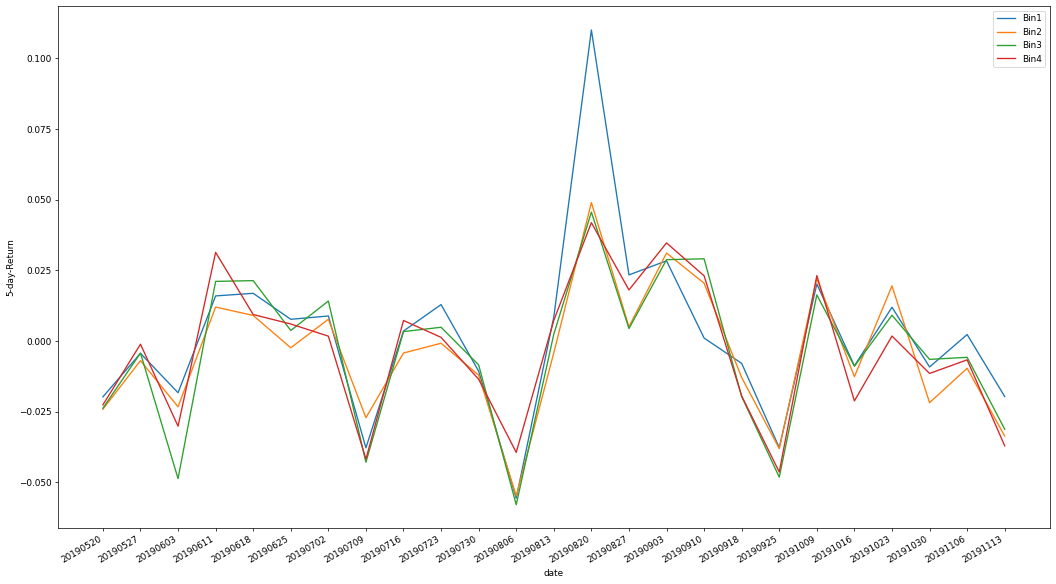

In [168]:
import matplotlib.pyplot as plt
period = [str(time[5*i+4]) for i in range(len(time)//5)]

#5日收益
fig = plt.figure(dpi = 64, figsize = (20,12))
plt.plot(period, Bin1_return, label = 'Bin1')
plt.plot(period, Bin2_return, label = 'Bin2')
plt.plot(period, Bin3_return, label = 'Bin3')
plt.plot(period, Bin4_return, label = 'Bin4')
fig.autofmt_xdate()
plt.xlabel('date')
plt.ylabel('5-day-Return')
plt.legend()
plt.show()

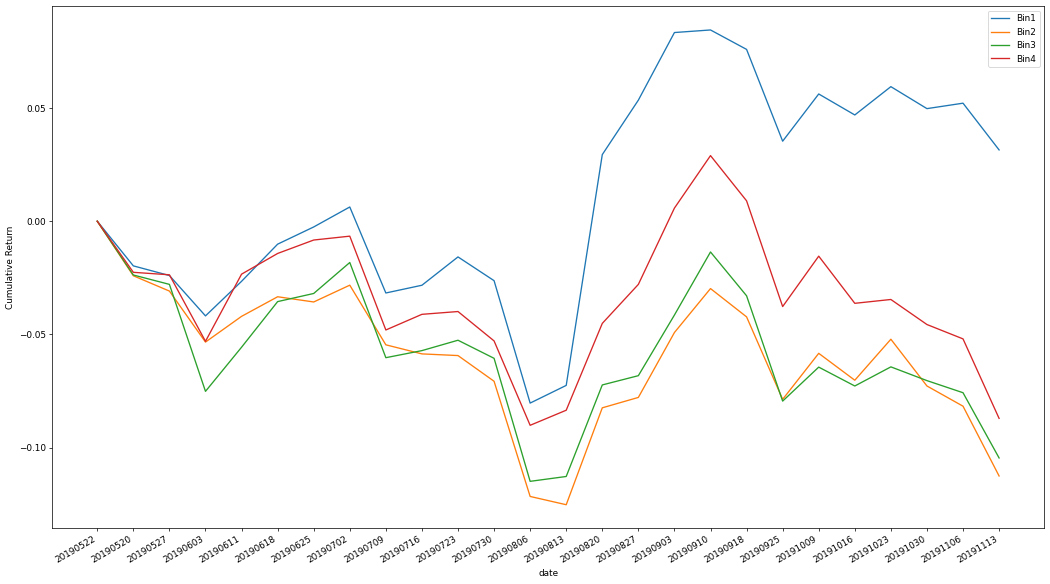

In [169]:
#累积收益
period.insert(0, '20190522')
fig = plt.figure(dpi = 64, figsize = (20,12))
plt.plot(period, Bin1_cr, label = 'Bin1')
plt.plot(period, Bin2_cr, label = 'Bin2')
plt.plot(period, Bin3_cr, label = 'Bin3')
plt.plot(period, Bin4_cr, label = 'Bin4')
fig.autofmt_xdate()
plt.xlabel('date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()